In [1]:
'''Analisis:
- All the data (list = patient with all values)
- BandPower = patient = 12 brain reagions = 5 bands = 1 value
- Lavels structure all patiens with one value = list (no shape)'''

'Analisis:\n- All the data (list = patient with all values)\n- BandPower = patient = 12 brain reagions = 5 bands = 1 value\n- Lavels structure all patiens with one value = list (no shape)'

In [2]:
#Multiple regression is like linear regression, but with more than one independent value, meaning that we try to predict a value based on two or more variables.
import numpy as np
import matplotlib.pyplot as plt
from numpy import savetxt
import pickle
import csv
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.utils import shuffle
import random
import sklearn.metrics as sm
import statistics
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import neighbors
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB

import multiprocessing
import xgboost as xgb
import pandas as pd
import numpy as np
import pickle 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
import warnings
warnings.filterwarnings("ignore")
import datetime
starttime = datetime.datetime.now()
import csv
from scipy import stats
import numpy as np
import collections, numpy

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

def cal_average(num):
    sum_num = 0
    for t in num:
        sum_num = sum_num + t           

    avg = sum_num / len(num)
    return avg

In [3]:
with open("/Users/laianavarroolivella/Proyectos/EEG/2.banpowerEpoch12BR/list_finalEO.txt", "rb") as fp:   # Unpickling
    withEpoch = pickle.load(fp)

with open("/Users/laianavarroolivella/Proyectos/EEG/1.dataToBrainReagions/sorted_list_EO.txt", "rb") as fp:   # Unpickling
    sorted_list_EC_up = pickle.load(fp)

In [4]:
#Import the data to analise
#Open the file in universal line ending mode 
with open('/Users/laianavarroolivella/Proyectos/EEG/Files_EEG/TEIQue-SF.csv', 'rU') as infile:
  # read the file as a dictionary for each row ({header : value})
  data = {}
  reader = csv.DictReader(infile)
  for row in reader:
    for header, value in row.items():
      try:
        data[header].append(value)
      except KeyError:
        data[header] = [value]

# extract the variables you want
names = data['ID']
TeiQueSF_emotionality = data['TeiQueSF_emotionality']
TeiQueSF_wellBeing = data['TeiQueSF_well_being']
TeiQueSF_total = data['TeiQueSF_total']

In [5]:
xCorr = []
for e in range(0,len(sorted_list_EC_up)):       #For each frequency band:
    hename = sorted_list_EC_up[e]   #Select the name of the patient
    hename = str(hename[:-7])  #Select only the number witout the extension 
    if hename in names:    #If this is in the testNames:
        indices = [i for i, s in enumerate(names) if hename in s] #Get the position of the testNames
        x = (float(TeiQueSF_wellBeing[int(indices[0])])) #Get the value of the patient in the test selected
        xCorr.append(x) #Add it in to the xCorr
    else:
        print("No esta"+hename)

In [6]:
'''from sklearn.preprocessing import StandardScaler
d = np.array(withEpoch) 
print(d.shape)
p = d.T
d = p.reshape(60,187)
df = d.T
print(df.shape)
x = StandardScaler().fit_transform(df)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
from pandas import DataFrame

dfR = DataFrame (xCorr, columns=['target'])

finalDf = pd.concat([principalDf, dfR], axis = 1)
'''

"from sklearn.preprocessing import StandardScaler\nd = np.array(withEpoch) \nprint(d.shape)\np = d.T\nd = p.reshape(60,187)\ndf = d.T\nprint(df.shape)\nx = StandardScaler().fit_transform(df)\npca = PCA(n_components=2)\nprincipalComponents = pca.fit_transform(x)\nprincipalDf = pd.DataFrame(data = principalComponents\n             , columns = ['principal component 1', 'principal component 2'])\nfrom pandas import DataFrame\n\ndfR = DataFrame (xCorr, columns=['target'])\n\nfinalDf = pd.concat([principalDf, dfR], axis = 1)\n"

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
d = np.array(withEpoch) 
print(d.shape)
p = d.T
d = p.reshape(60,187)
df = d.T
print(df.shape)
x = StandardScaler().fit_transform(df)
x = pd.DataFrame(x)
from sklearn.decomposition import PCA
pcamodel = PCA(n_components=30)
pca = pcamodel.fit_transform(x)
print(pca.shape)



(12, 5, 187)
(187, 60)
(187, 30)


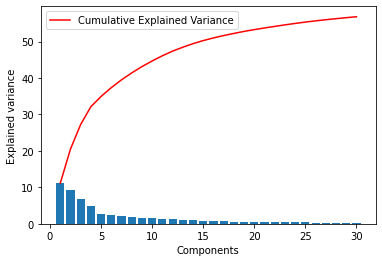

In [8]:
plt.bar(range(1,len(pcamodel.explained_variance_ )+1),pcamodel.explained_variance_ )
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(pcamodel.explained_variance_ )+1),
         np.cumsum(pcamodel.explained_variance_),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='upper left')

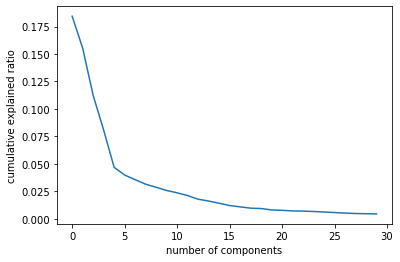

0.9419399957902931


In [9]:
plt.plot(pcamodel.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained ratio')
plt.show()
print(sum(pcamodel.explained_variance_ratio_))
#PCA1 is at 0 in xscale

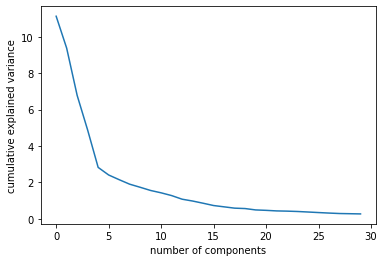

In [10]:
plt.plot(pcamodel.explained_variance_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [11]:
#Lavels
Y = np.array(xCorr)
print(type(Y))
print(Y.shape)
th=5.5
pcazerox = []
pcazeroy = []
pcazeroz = []
pcaunox = []
pcaunoy = []
pcaunoz = []
for i  in range(0,len(Y)):
    if Y[i]>=th:
        pcazerox.append(pca[i,0])
        pcazeroy.append(pca[i,1])
        pcazeroz.append(pca[i,2])
        r=r+1
    if Y[i]<th:
        pcaunox.append(pca[i,0])
        pcaunoy.append(pca[i,1])
        pcaunoz.append(pca[i,2])

<class 'numpy.ndarray'>
(187,)


NameError: name 'r' is not defined

In [33]:
display_factorial_planes(pca, Y, pca, [(1,2),(2,3),(3,4)], illustrative_var = rank_band, alpha = 0.5)

NameError: name 'display_factorial_planes' is not defined

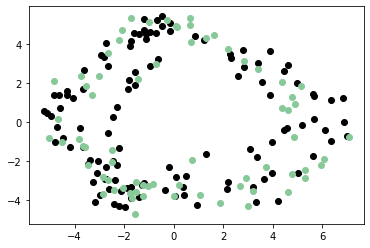

In [67]:
plt.scatter(pcazerox, pcazeroy, color = 'black')
plt.scatter(pcaunox, pcaunoy, color = '#88c999')

plt.show()
#plt.scatter(pca[:, 0], pca[:, 1], marker, label=Lavels2)

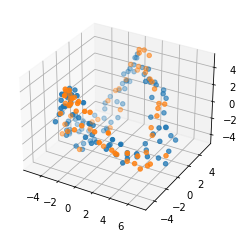

In [68]:
ax = plt.axes(projection='3d')

ax.scatter3D(pcazerox, pcazeroy, pcazeroz, cmap='Greens')
ax.scatter3D(pcaunox, pcaunoy, pcaunoz, cmap='Greens')



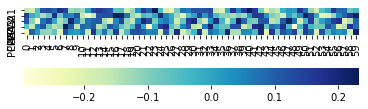

In [13]:
ax = sns.heatmap(pcamodel.components_,
                 cmap='YlGnBu',
                 yticklabels=[ "PCA"+str(x) for x in range(1,pcamodel.n_components_+1)],
                 xticklabels=list(x.columns),
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")

In [14]:
c2=pca

KNeighborsClassifier

**************************************************** 0.1
     --
Counter({1: 60, 0: 57})
     Pred:  [0 0 0 0 1 1 0 1 0 0 0 1 1]
     Data:  [0 0 1 1 1 1 1 1 1 1 1 0 1]
     ACC 0.46153846153846156
     F1 0.5333333333333333
     Recal 0.4
     Precision 0.8
     --
Counter({1: 62, 0: 55})
     Pred:  [1 0 0 1 0 1 1 1 0 1 0 1 1]
     Data:  [1 1 1 1 1 1 0 0 0 1 0 1 0]
     ACC 0.5384615384615384
     F1 0.625
     Recal 0.625
     Precision 0.625
     --
Counter({1: 62, 0: 55})
     Pred:  [0 1 0 1 0 1 0 0 1 1 1 0 1]
     Data:  [0 0 0 1 1 1 0 1 1 0 1 1 1]
     ACC 0.6153846153846154
     F1 0.6666666666666666
     Recal 0.625
     Precision 0.7142857142857143
     --
Counter({1: 60, 0: 57})
     Pred:  [1 0 1 1 1 1 0 1 0 1 0 0 1]
     Data:  [1 0 1 1 0 1 0 1 1 1 1 1 1]
     ACC 0.6923076923076923
     F1 0.7777777777777777
     Recal 0.7
     Precision 0.875
     --
Counter({1: 64, 0: 53})
     Pred:  [0 1 1 1 1 0 0 0 0 1 0 0 0]
     Data:  [0 1 1 0 1 1 1 0 0 0 1 0 0]
     ACC 0.61538

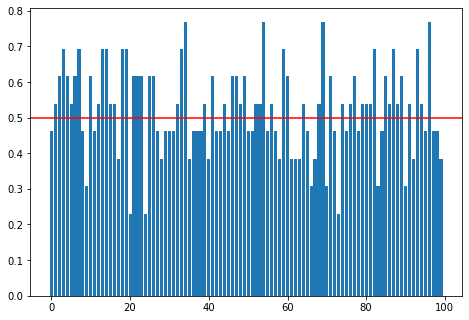

0.5215384615384615
**************************************************** 0.2
     --
Counter({1: 58, 0: 46})
     Pred:  [1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0 1 0 0 1 1]
     Data:  [1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1 0 1]
     ACC 0.4230769230769231
     F1 0.4444444444444445
     Recal 0.5
     Precision 0.4
     --
Counter({1: 52, 0: 52})
     Pred:  [0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 1 1 1 1 0]
     Data:  [0 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1]
     ACC 0.34615384615384615
     F1 0.41379310344827586
     Recal 0.3333333333333333
     Precision 0.5454545454545454
     --
Counter({1: 54, 0: 50})
     Pred:  [1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 1]
     Data:  [0 1 1 0 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 1 0 1 0 1 0]
     ACC 0.38461538461538464
     F1 0.5
     Recal 0.5
     Precision 0.5
     --
Counter({1: 54, 0: 50})
     Pred:  [1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1]
     Data:  [1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 1 

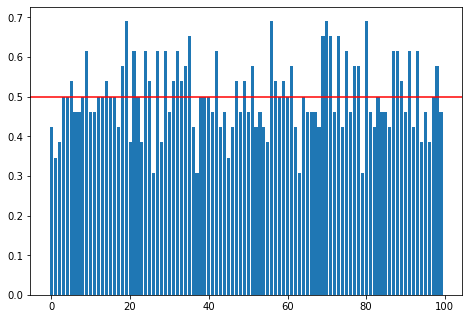

0.49999999999999967
**************************************************** 0.3
     --
Counter({1: 50, 0: 41})
     Pred:  [0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 0 0 1 0 0 1
 0 0]
     Data:  [1 1 1 0 0 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0
 1 0]
     ACC 0.4358974358974359
     F1 0.47619047619047616
     Recal 0.5
     Precision 0.45454545454545453
     --
Counter({1: 47, 0: 44})
     Pred:  [0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1
 0 0]
     Data:  [1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 0
 1 1]
     ACC 0.4358974358974359
     F1 0.3529411764705882
     Recal 0.2608695652173913
     Precision 0.5454545454545454
     --
Counter({1: 47, 0: 44})
     Pred:  [0 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 1 0
 1 1]
     Data:  [0 0 0 0 1 1 0 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1
 1 0]
     ACC 0.4358974358974359
     F1 0.476190

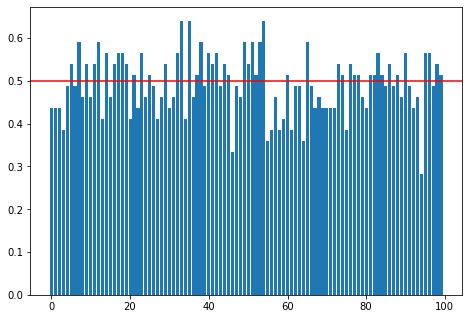

0.4930769230769231
**************************************************** 0.4
     --
Counter({1: 42, 0: 36})
     Pred:  [0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0
 1 0 0 1 1 0 1 0 0 1 1 0 1 1 1]
     Data:  [1 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1 1 1
 1 0 1 1 0 0 0 1 1 0 1 1 1 0 1]
     ACC 0.5
     F1 0.5
     Recal 0.4642857142857143
     Precision 0.5416666666666666
     --
Counter({1: 44, 0: 34})
     Pred:  [1 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 0 0 0 1 0 1 1 1
 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1]
     Data:  [1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0
 1 1 0 0 0 0 1 0 1 1 0 1 1 1 1]
     ACC 0.5384615384615384
     F1 0.5999999999999999
     Recal 0.6923076923076923
     Precision 0.5294117647058824
     --
Counter({1: 41, 0: 37})
     Pred:  [1 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 1 1 0
 0 1 0 1 0 0 1 1 1 1 1 1 0 1 0]
     Data:  [0 1 0 0 1 0 

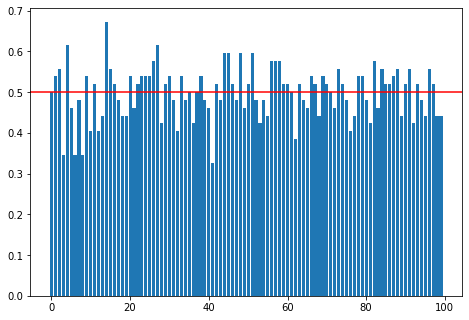

0.49846153846153834


In [16]:
xin = list(range(100))
th=5.5
numpase = 0 #COUNTER OF THE EPOCHS THAT PAS THE 0.55 ACCURACY
accurt = [] #SAVE THE ACCURACY
f1scoret = []
recallscrt = []
presitt = []
for divider in range(1,5):
    print("**************************************************** "+'0.'+str(divider)) #PRINT THE PARTITION OF THE DATA
    numpase = 0 #COUNTER OF THE EPOCHS THAT PAS THE 0.55 ACCURACY
    accur = [] #SAVE THE ACCURACY
    f1score = []
    recallscr = []
    presit = []
    for t in range(0,100):
        print("     --")
        c = list(zip(c2, xCorr)) # Zip so went we shuffle it dosent disarrange
        random.shuffle(c) #MIXT DATA
        DX, DY = zip(*c) #UNZIP
        Lavels2 = []
        X2=[]
        r=0

        for i  in range(0,len(DY)):
            if DY[i]>=th and r<60:
                Lavels2.append(int(0))
                X2.append(DX[i]) 
                r=r+1
            if DY[i]<th:
                Lavels2.append(int(1))
                X2.append(DX[i])

        X = np.array(X2)#TRANSFORM TO ARRAY
        Y = np.array(Lavels2)


        tnX, ttX, trainY, testY = train_test_split(X, Y, test_size=float('0.'+str(divider))) #DEVIDE DATA

        contt = collections.Counter(trainY)

        if contt[0]>6 and contt[1]>6:
            print(contt)
            mean_data = np.array(tnX)
            X_train = []
            X_train1 = (mean_data[:,0] - np.mean(mean_data[:,0])) / np.std(mean_data[:,0])
            X_train2 = (mean_data[:,1] - np.mean(mean_data[:,1])) / np.std(mean_data[:,1])
            for i in range(0, len(X_train1)):
                unif = []
                unif.append(X_train1[i])
                unif.append(X_train2[i])
                X_train.append(unif)

            mean_d = np.array(ttX)
            X_test = []
            X_test1 = (mean_d[:,0] - np.mean(mean_data[:,0])) / np.std(mean_data[:,0])
            X_test2 = (mean_d[:,1] - np.mean(mean_data[:,1])) / np.std(mean_data[:,1])
            for i in range(0, len(X_test1)):
                unif = []
                unif.append(X_test1[i])
                unif.append(X_test2[i])
                X_test.append(unif)
            X_test = np.array(X_test)
            X_train = np.array(X_train)
            xgb_model = neighbors.KNeighborsClassifier()           
            xgb_model.fit(X_train,trainY)
            predY = xgb_model.predict(X_test)
            print('     Pred: ', predY)
            print('     Data: ', testY)
            print("     ACC", accuracy_score(y_true=testY, y_pred=predY))
            accur.append(accuracy_score(y_true=testY, y_pred=predY))            
            print("     F1",f1_score(y_true=testY, y_pred=predY))
            f1score.append(float(f1_score(y_true=testY, y_pred=predY)))   
            print("     Recal",recall_score(y_true=testY,y_pred=predY))
            recallscr.append(recall_score(y_true=testY,y_pred=predY))
            print("     Precision",precision_score(y_true=testY, y_pred=predY))
            presit.append(precision_score(y_true=testY, y_pred=predY))

        else:
            accur.append(0)
            print('     Bad division')
    accurt.append(accur)
    f1scoret.append(f1score)
    recallscrt.append(recallscr)
    presitt.append(presit)
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    plt.axhline(y=0.5, color='r', linestyle='-')
    ax.bar(xin,accur)
    plt.show()
    print(cal_average(accur))

In [17]:
for i in range(0, len(accurt)):
    print('Av', cal_average(accurt[i]))
    print('F1',cal_average(f1scoret[i]))
    print('rec', cal_average(recallscrt[i]))
    print('pres', cal_average(presitt[i]))
    print(" ")

Av 0.5215384615384615
F1 0.5746287721566357
rec 0.6265948773448774
pres 0.570888528138528
 
Av 0.49999999999999967
F1 0.5525883482664679
rec 0.5946140831133093
pres 0.535933879501991
 
Av 0.4930769230769231
F1 0.5439218279669865
rec 0.5819107240055079
pres 0.5263946684174192
 
Av 0.49846153846153834
F1 0.5510508742054161
rec 0.5872930482799871
pres 0.5342943000976782
 


XGBClassifier

**************************************************** 0.1
     --
Counter({1: 62, 0: 55})
     Pred:  [0 0 0 1 0 1 1 1 1 0 1 1 1]
     Data:  [1 1 1 0 1 0 1 0 1 0 1 0 1]
     ACC 0.38461538461538464
     F1 0.5
     Recal 0.5
     Precision 0.5
     --
Counter({1: 62, 0: 55})
     Pred:  [0 0 1 1 0 0 0 1 0 1 1 1 0]
     Data:  [1 0 0 1 0 1 1 1 0 1 1 1 0]
     ACC 0.6923076923076923
     F1 0.7142857142857143
     Recal 0.625
     Precision 0.8333333333333334
     --
Counter({1: 61, 0: 56})
     Pred:  [0 1 0 1 0 1 1 0 0 1 1 1 0]
     Data:  [1 1 1 0 1 0 0 1 1 1 1 1 0]
     ACC 0.38461538461538464
     F1 0.5
     Recal 0.4444444444444444
     Precision 0.5714285714285714
     --
Counter({1: 66, 0: 51})
     Pred:  [1 0 1 1 1 1 1 1 0 0 1 1 0]
     Data:  [0 0 0 0 1 0 0 0 1 1 0 0 1]
     ACC 0.15384615384615385
     F1 0.15384615384615383
     Recal 0.25
     Precision 0.1111111111111111
     --
Counter({1: 66, 0: 51})
     Pred:  [1 1 1 1 1 1 1 0 1 1 1 0 1]
     Data:  [1 0 0 0 1 0 0 1 0

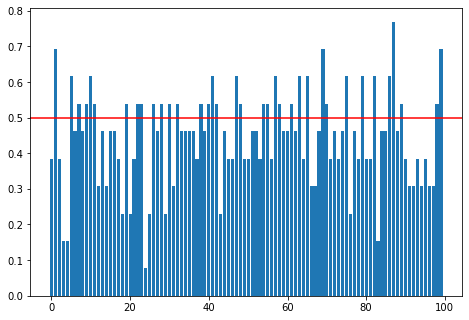

0.4469230769230768
**************************************************** 0.2
     --
Counter({1: 61, 0: 43})
     Pred:  [1 1 0 0 1 1 1 0 1 1 1 0 1 0 0 1 0 0 1 1 1 0 1 1 1 1]
     Data:  [0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0]
     ACC 0.38461538461538464
     F1 0.3846153846153846
     Recal 0.5555555555555556
     Precision 0.29411764705882354
     --
Counter({1: 55, 0: 49})
     Pred:  [0 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 0 1 1 0 1]
     Data:  [1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 0 1 1 0 0 0]
     ACC 0.5
     F1 0.5806451612903225
     Recal 0.6
     Precision 0.5625
     --
Counter({1: 56, 0: 48})
     Pred:  [1 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 0]
     Data:  [1 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 0 0]
     ACC 0.5769230769230769
     F1 0.6451612903225806
     Recal 0.7142857142857143
     Precision 0.5882352941176471
     --
Counter({1: 53, 0: 51})
     Pred:  [0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1]
     Data:  [0 1 

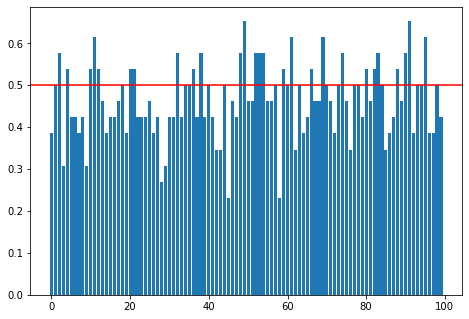

0.465
**************************************************** 0.3
     --
Counter({1: 49, 0: 42})
     Pred:  [0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 1 1 1 1
 1 1]
     Data:  [1 0 1 1 0 1 0 1 0 1 0 0 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 0 1 1
 0 0]
     ACC 0.38461538461538464
     F1 0.4545454545454545
     Recal 0.47619047619047616
     Precision 0.43478260869565216
     --
Counter({1: 52, 0: 39})
     Pred:  [0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0
 1 1]
     Data:  [1 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 1
 1 0]
     ACC 0.28205128205128205
     F1 0.391304347826087
     Recal 0.5
     Precision 0.32142857142857145
     --
Counter({1: 49, 0: 42})
     Pred:  [1 1 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1
 1 1]
     Data:  [1 1 1 0 1 1 1 0 0 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 0 0 1 0 1 0
 0 0]
     ACC 0.5384615384615384
     F1 0.6086956521739131
 

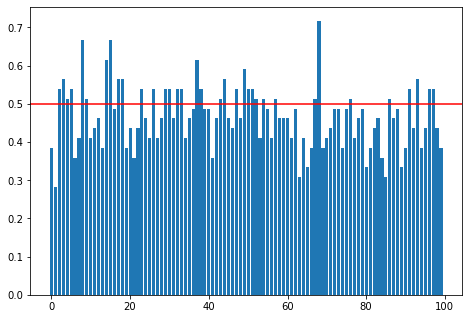

0.4682051282051283
**************************************************** 0.4
     --
Counter({1: 40, 0: 38})
     Pred:  [1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1
 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0]
     Data:  [0 1 0 1 1 0 1 0 1 0 0 0 0 1 1 1 1 1 0 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1
 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1]
     ACC 0.5192307692307693
     F1 0.5614035087719299
     Recal 0.5333333333333333
     Precision 0.5925925925925926
     --
Counter({1: 44, 0: 34})
     Pred:  [1 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1
 1 0 1 0 0 0 1 1 0 0 1 1 0 1 1]
     Data:  [1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 0 0 0
 0 0 1 1 0 1 0 0 1 0 1 0 0 0 1]
     ACC 0.4423076923076923
     F1 0.4727272727272727
     Recal 0.5
     Precision 0.4482758620689655
     --
Counter({1: 43, 0: 35})
     Pred:  [1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 0
 0 0 1 0 1 1 1 1 0 1 0 1 1 0 1]
     Data:

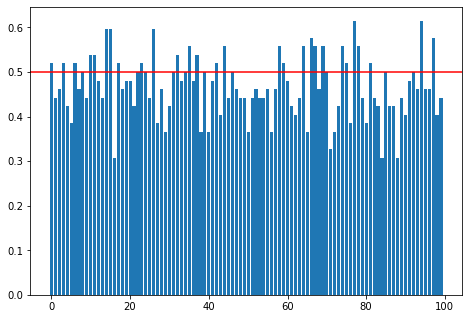

0.4682692307692306


In [18]:
xin = list(range(100))
th=5.5
numpase = 0 #COUNTER OF THE EPOCHS THAT PAS THE 0.55 ACCURACY
accurt = [] #SAVE THE ACCURACY
f1scoret = []
recallscrt = []
presitt = []
for divider in range(1,5):
    print("**************************************************** "+'0.'+str(divider)) #PRINT THE PARTITION OF THE DATA
    numpase = 0 #COUNTER OF THE EPOCHS THAT PAS THE 0.55 ACCURACY
    accur = [] #SAVE THE ACCURACY
    f1score = []
    recallscr = []
    presit = []
    for t in range(0,100):
        print("     --")
        c = list(zip(c2, xCorr)) # Zip so went we shuffle it dosent disarrange
        random.shuffle(c) #MIXT DATA
        DX, DY = zip(*c) #UNZIP
        Lavels2 = []
        X2=[]
        r=0

        for i  in range(0,len(DY)):
            if DY[i]>=th and r<60:
                Lavels2.append(int(0))
                X2.append(DX[i]) 
                r=r+1
            if DY[i]<th:
                Lavels2.append(int(1))
                X2.append(DX[i])

        X = np.array(X2)#TRANSFORM TO ARRAY
        Y = np.array(Lavels2)


        tnX, ttX, trainY, testY = train_test_split(X, Y, test_size=float('0.'+str(divider))) #DEVIDE DATA


        contt = collections.Counter(trainY)

        if contt[0]>6 and contt[1]>6:
            print(contt)
            mean_data = np.array(tnX)
            X_train = []
            X_train1 = (mean_data[:,0] - np.mean(mean_data[:,0])) / np.std(mean_data[:,0])
            X_train2 = (mean_data[:,1] - np.mean(mean_data[:,1])) / np.std(mean_data[:,1])
            for i in range(0, len(X_train1)):
                unif = []
                unif.append(X_train1[i])
                unif.append(X_train2[i])
                X_train.append(unif)

            mean_d = np.array(ttX)
            X_test = []
            X_test1 = (mean_d[:,0] - np.mean(mean_data[:,0])) / np.std(mean_data[:,0])
            X_test2 = (mean_d[:,1] - np.mean(mean_data[:,1])) / np.std(mean_data[:,1])
            for i in range(0, len(X_test1)):
                unif = []
                unif.append(X_test1[i])
                unif.append(X_test2[i])
                X_test.append(unif)
            X_test = np.array(X_test)
            X_train = np.array(X_train)
            xgb_model = xgb.XGBClassifier(max_depth=6,learning_rate=0.1,n_estimators=50,
                                            objective='binary:logistic',booster='gbtree',n_jobs=20,
                                            subsample=0.9, colsample_bytree=0.9, colsample_bylevel=0.9,
                                            reg_alpha=0.5, reg_lambda=1.0,gamma=0,
                                            scale_pos_weight=1)           
            xgb_model.fit(X_train,trainY)
            predY = xgb_model.predict(X_test)
            print('     Pred: ', predY)
            print('     Data: ', testY)
            print("     ACC", accuracy_score(y_true=testY, y_pred=predY))
            accur.append(accuracy_score(y_true=testY, y_pred=predY))            
            print("     F1",f1_score(y_true=testY, y_pred=predY))
            f1score.append(float(f1_score(y_true=testY, y_pred=predY)))   
            print("     Recal",recall_score(y_true=testY,y_pred=predY))
            recallscr.append(recall_score(y_true=testY,y_pred=predY))
            print("     Precision",precision_score(y_true=testY, y_pred=predY))
            presit.append(precision_score(y_true=testY, y_pred=predY))

        else:
            accur.append(0)
            print('     Bad division')
    accurt.append(accur)
    f1scoret.append(f1score)
    recallscrt.append(recallscr)
    presitt.append(presit)
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    plt.axhline(y=0.5, color='r', linestyle='-')
    ax.bar(xin,accur)
    plt.show()
    print(cal_average(accur))

In [19]:
for i in range(0, len(accurt)):
    print('Av', cal_average(accurt[i]))
    print('F1',cal_average(f1scoret[i]))
    print('rec', cal_average(recallscrt[i]))
    print('pres', cal_average(presitt[i]))
    print(" ")

Av 0.4469230769230768
F1 0.48322373507125826
rec 0.54283658008658
pres 0.4836452158952159
 
Av 0.465
F1 0.5158004123680091
rec 0.5394226799602184
pres 0.5124489434284327
 
Av 0.4682051282051283
F1 0.5191981436755702
rec 0.5457165760960151
pres 0.5135357670074088
 
Av 0.4682692307692306
F1 0.5105737600489069
rec 0.5292650152281587
pres 0.5156722867229743
 


Random forest classifier

**************************************************** 0.1
     --
Counter({1: 64, 0: 53})
     Pred:  [1 1 1 0 1 1 1 1 1 1 1 1 1]
     Data:  [0 0 0 1 1 1 1 0 0 1 1 0 0]
     ACC 0.38461538461538464
     F1 0.5555555555555556
     Recal 0.8333333333333334
     Precision 0.4166666666666667
     --
Counter({1: 65, 0: 52})
     Pred:  [1 0 1 1 0 1 1 0 0 1 1 1 1]
     Data:  [0 1 1 1 0 0 0 1 0 0 0 0 1]
     ACC 0.38461538461538464
     F1 0.42857142857142855
     Recal 0.6
     Precision 0.3333333333333333
     --
Counter({1: 61, 0: 56})
     Pred:  [1 0 1 0 0 0 0 0 0 0 1 0 0]
     Data:  [1 1 1 0 0 1 0 1 0 1 1 1 1]
     ACC 0.5384615384615384
     F1 0.5
     Recal 0.3333333333333333
     Precision 1.0
     --
Counter({1: 63, 0: 54})
     Pred:  [0 1 0 1 1 0 1 1 1 0 1 0 0]
     Data:  [1 0 1 1 0 1 0 0 0 1 0 1 1]
     ACC 0.07692307692307693
     F1 0.14285714285714285
     Recal 0.14285714285714285
     Precision 0.14285714285714285
     --
Counter({1: 63, 0: 54})
     Pred:  [1 0 1 1 0 1 

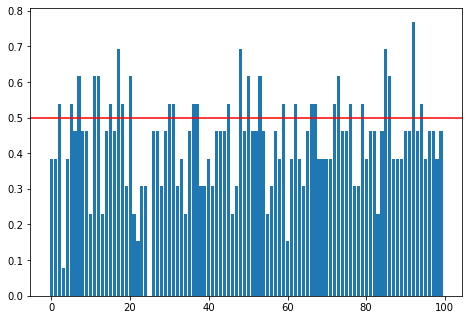

0.4323076923076921
**************************************************** 0.2
     --
Counter({1: 56, 0: 48})
     Pred:  [0 0 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 1 0 0 1 0]
     Data:  [1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1 1 1]
     ACC 0.5
     F1 0.5517241379310344
     Recal 0.5714285714285714
     Precision 0.5333333333333333
     --
Counter({0: 53, 1: 51})
     Pred:  [1 1 0 0 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 0 1 1 1 0]
     Data:  [0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 1 1 1]
     ACC 0.38461538461538464
     F1 0.5
     Recal 0.42105263157894735
     Precision 0.6153846153846154
     --
Counter({1: 54, 0: 50})
     Pred:  [0 1 0 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1 1]
     Data:  [1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 1 1 0 0 0 1 0 1 0 1]
     ACC 0.46153846153846156
     F1 0.5625
     Recal 0.5625
     Precision 0.5625
     --
Counter({1: 55, 0: 49})
     Pred:  [0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 1 1 1 0]
     Data:  [1 0 0 1 1 1 1 0 0 1 1 1 1 1

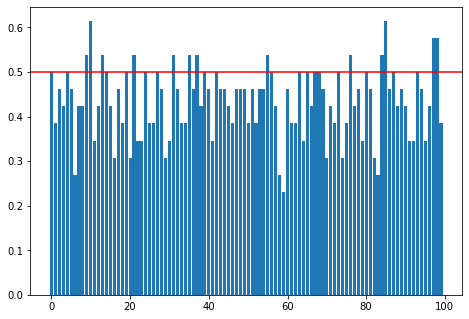

0.43538461538461504
**************************************************** 0.3
     --
Counter({1: 49, 0: 42})
     Pred:  [1 1 0 1 0 0 1 0 1 0 0 1 0 1 1 1 0 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 0 1 0 0 1
 0 0]
     Data:  [0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 1 1 1 0 1 0 1
 1 1]
     ACC 0.38461538461538464
     F1 0.42857142857142855
     Recal 0.42857142857142855
     Precision 0.42857142857142855
     --
Counter({1: 46, 0: 45})
     Pred:  [0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1
 0 1]
     Data:  [1 1 1 0 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 0 1 1 1
 1 1]
     ACC 0.46153846153846156
     F1 0.5116279069767442
     Recal 0.4583333333333333
     Precision 0.5789473684210527
     --
Counter({1: 56, 0: 35})
     Pred:  [0 0 0 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0
 1 1]
     Data:  [1 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1
 0 0]
     ACC 0.358974358974359

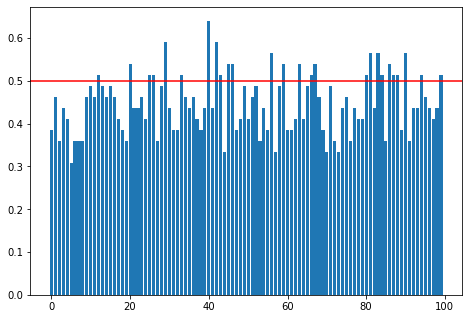

0.44794871794871766
**************************************************** 0.4
     --
Counter({1: 41, 0: 37})
     Pred:  [1 1 1 1 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1
 0 1 0 0 0 1 0 1 1 1 1 0 1 0 0]
     Data:  [1 0 1 0 1 1 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 1 0 1 0 1 1
 1 1 0 1 0 0 1 1 1 0 0 1 1 1 1]
     ACC 0.5576923076923077
     F1 0.5660377358490567
     Recal 0.5172413793103449
     Precision 0.625
     --
Counter({1: 42, 0: 36})
     Pred:  [1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 0 1 0
 1 1 0 1 1 0 1 0 0 1 1 0 0 1 1]
     Data:  [0 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0
 0 1 1 1 1 0 0 1 1 1 0 0 1 1 0]
     ACC 0.4807692307692308
     F1 0.5263157894736843
     Recal 0.5357142857142857
     Precision 0.5172413793103449
     --
Counter({1: 41, 0: 37})
     Pred:  [1 1 0 1 1 0 1 1 1 0 0 1 1 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 1 1 1 0 0 1 1 1 1
 1 1 1 0 0 0 0 1 1 0 1 1 1 1 0]
     Da

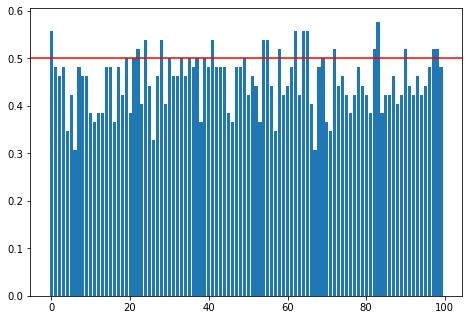

0.45269230769230745


In [20]:
xin = list(range(100))
th=5.5
numpase = 0 #COUNTER OF THE EPOCHS THAT PAS THE 0.55 ACCURACY
accurt = [] #SAVE THE ACCURACY
f1scoret = []
recallscrt = []
presitt = []
for divider in range(1,5):
    print("**************************************************** "+'0.'+str(divider)) #PRINT THE PARTITION OF THE DATA
    numpase = 0 #COUNTER OF THE EPOCHS THAT PAS THE 0.55 ACCURACY
    accur = [] #SAVE THE ACCURACY
    f1score = []
    recallscr = []
    presit = []
    for t in range(0,100):
        print("     --")
        c = list(zip(c2, xCorr)) # Zip so went we shuffle it dosent disarrange
        random.shuffle(c) #MIXT DATA
        DX, DY = zip(*c) #UNZIP
        Lavels2 = []
        X2=[]
        r=0

        for i  in range(0,len(DY)):
            if DY[i]>=th and r<60:
                Lavels2.append(int(0))
                X2.append(DX[i]) 
                r=r+1
            if DY[i]<th:
                Lavels2.append(int(1))
                X2.append(DX[i])

        X = np.array(X2)#TRANSFORM TO ARRAY
        Y = np.array(Lavels2)


        tnX, ttX, trainY, testY = train_test_split(X, Y, test_size=float('0.'+str(divider))) #DEVIDE DATA

        contt = collections.Counter(trainY)

        if contt[0]>6 and contt[1]>6:
            print(contt)
            mean_data = np.array(tnX)
            X_train = []
            X_train1 = (mean_data[:,0] - np.mean(mean_data[:,0])) / np.std(mean_data[:,0])
            X_train2 = (mean_data[:,1] - np.mean(mean_data[:,1])) / np.std(mean_data[:,1])
            for i in range(0, len(X_train1)):
                unif = []
                unif.append(X_train1[i])
                unif.append(X_train2[i])
                X_train.append(unif)

            mean_d = np.array(ttX)
            X_test = []
            X_test1 = (mean_d[:,0] - np.mean(mean_data[:,0])) / np.std(mean_data[:,0])
            X_test2 = (mean_d[:,1] - np.mean(mean_data[:,1])) / np.std(mean_data[:,1])
            for i in range(0, len(X_test1)):
                unif = []
                unif.append(X_test1[i])
                unif.append(X_test2[i])
                X_test.append(unif)
            X_test = np.array(X_test)
            X_train = np.array(X_train)
            xgb_model = RandomForestClassifier(max_depth=30, random_state=0)       
            xgb_model.fit(X_train,trainY)
            predY = xgb_model.predict(X_test)
            print('     Pred: ', predY)
            print('     Data: ', testY)
            print("     ACC", accuracy_score(y_true=testY, y_pred=predY))
            accur.append(accuracy_score(y_true=testY, y_pred=predY))            
            print("     F1",f1_score(y_true=testY, y_pred=predY))
            f1score.append(float(f1_score(y_true=testY, y_pred=predY)))   
            print("     Recal",recall_score(y_true=testY,y_pred=predY))
            recallscr.append(recall_score(y_true=testY,y_pred=predY))
            print("     Precision",precision_score(y_true=testY, y_pred=predY))
            presit.append(precision_score(y_true=testY, y_pred=predY))

        else:
            accur.append(0)
            print('     Bad division')
    accurt.append(accur)
    f1scoret.append(f1score)
    recallscrt.append(recallscr)
    presitt.append(presit)
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    plt.axhline(y=0.5, color='r', linestyle='-')
    ax.bar(xin,accur)
    plt.show()
    print(cal_average(accur))

In [21]:
for i in range(0, len(accurt)):
    print('Av', cal_average(accurt[i]))
    print('F1',cal_average(f1scoret[i]))
    print('rec', cal_average(recallscrt[i]))
    print('pres', cal_average(presitt[i]))
    print(" ")

Av 0.4323076923076921
F1 0.4713536094967982
rec 0.4757240259740258
pres 0.5078841991341991
 
Av 0.43538461538461504
F1 0.46941199437978126
rec 0.47593261296666883
pres 0.49084989554649
 
Av 0.44794871794871766
F1 0.48696088555146916
rec 0.4960704566301618
pres 0.4972164138457964
 
Av 0.45269230769230745
F1 0.4962641183501802
rec 0.516481740357949
pres 0.49052653621305387
 


gaussian nb

**************************************************** 0.1
     --
Counter({1: 64, 0: 53})
     Pred:  [1 1 1 1 0 1 1 1 1 1 1 1 0]
     Data:  [0 1 1 1 0 0 1 1 0 0 1 0 0]
     ACC 0.6153846153846154
     F1 0.7058823529411764
     Recal 1.0
     Precision 0.5454545454545454
     --
Counter({1: 67, 0: 50})
     Pred:  [1 1 1 1 1 1 1 1 1 1 1 1 1]
     Data:  [0 0 0 1 0 1 0 1 0 0 0 0 0]
     ACC 0.23076923076923078
     F1 0.375
     Recal 1.0
     Precision 0.23076923076923078
     --
Counter({1: 64, 0: 53})
     Pred:  [0 1 1 0 1 0 0 1 1 0 1 1 1]
     Data:  [1 1 0 0 0 0 0 0 1 1 1 0 1]
     ACC 0.5384615384615384
     F1 0.5714285714285715
     Recal 0.6666666666666666
     Precision 0.5
     --
Counter({1: 61, 0: 56})
     Pred:  [0 1 1 1 1 0 1 0 1 1 0 0 1]
     Data:  [0 1 1 1 1 1 1 0 1 0 0 1 1]
     ACC 0.7692307692307693
     F1 0.823529411764706
     Recal 0.7777777777777778
     Precision 0.875
     --
Counter({1: 65, 0: 52})
     Pred:  [1 0 1 0 1 1 1 1 1 1 1 1 1]
     Data:  [0 0 

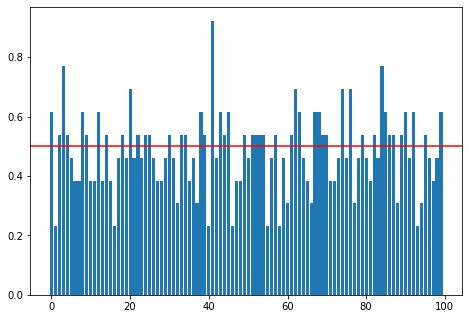

0.48384615384615387
**************************************************** 0.2
     --
Counter({1: 60, 0: 44})
     Pred:  [1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
     Data:  [1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 1 0 1 1 0 0 1 0 0]
     ACC 0.46153846153846156
     F1 0.5882352941176471
     Recal 1.0
     Precision 0.4166666666666667
     --
Counter({1: 56, 0: 48})
     Pred:  [1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1]
     Data:  [0 1 1 1 1 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 1 0 1 1 0 0]
     ACC 0.6153846153846154
     F1 0.7222222222222223
     Recal 0.9285714285714286
     Precision 0.5909090909090909
     --
Counter({1: 53, 0: 51})
     Pred:  [0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1]
     Data:  [0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 0 0 1 1 0]
     ACC 0.5
     F1 0.6060606060606061
     Recal 0.5882352941176471
     Precision 0.625
     --
Counter({1: 55, 0: 49})
     Pred:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
     Data:  [1 0 0

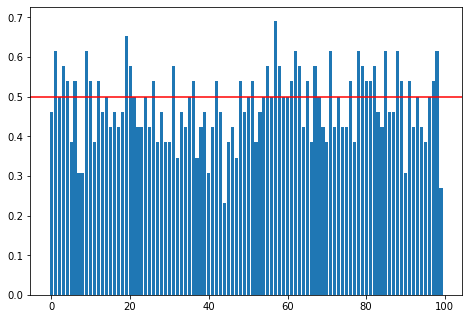

0.4780769230769229
**************************************************** 0.3
     --
Counter({1: 47, 0: 44})
     Pred:  [1 0 0 1 1 0 1 0 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0
 1 0]
     Data:  [0 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1
 0 1]
     ACC 0.41025641025641024
     F1 0.46511627906976744
     Recal 0.43478260869565216
     Precision 0.5
     --
Counter({0: 46, 1: 45})
     Pred:  [1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 1 1 1 0 0 0
 0 0]
     Data:  [1 1 1 0 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 0 1
 1 0]
     ACC 0.5384615384615384
     F1 0.6250000000000001
     Recal 0.6
     Precision 0.6521739130434783
     --
Counter({1: 51, 0: 40})
     Pred:  [0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1
 0 1]
     Data:  [0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 1 0 0
 0 0]
     ACC 0.46153846153846156
     F1 0.5531914893617021
   

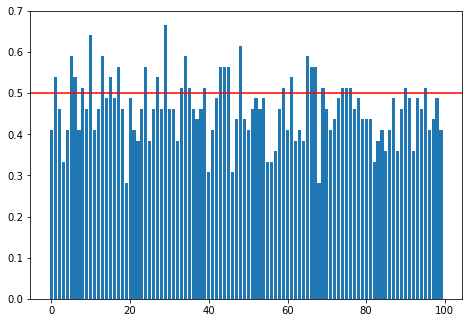

0.4620512820512819
**************************************************** 0.4
     --
Counter({1: 46, 0: 32})
     Pred:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1]
     Data:  [1 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0
 0 1 0 0 1 0 0 0 1 0 1 1 1 0 0]
     ACC 0.5192307692307693
     F1 0.6575342465753424
     Recal 1.0
     Precision 0.4897959183673469
     --
Counter({0: 40, 1: 38})
     Pred:  [0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0]
     Data:  [1 1 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1
 0 1 1 0 1 1 0 1 0 1 0 1 0 0 0]
     ACC 0.5384615384615384
     F1 0.5555555555555556
     Recal 0.46875
     Precision 0.6818181818181818
     --
Counter({1: 42, 0: 36})
     Pred:  [0 0 1 0 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1
 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1]
     Data:  [1 0 0 1 

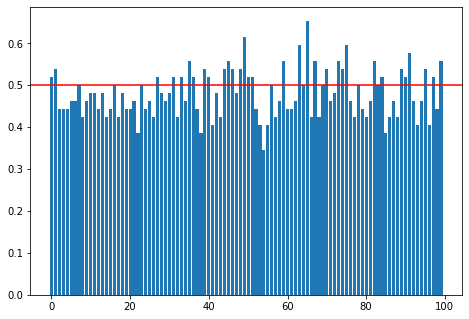

0.47961538461538444


In [22]:
xin = list(range(100))
th=5.5
numpase = 0 #COUNTER OF THE EPOCHS THAT PAS THE 0.55 ACCURACY
accurt = [] #SAVE THE ACCURACY
f1scoret = []
recallscrt = []
presitt = []
for divider in range(1,5):
    print("**************************************************** "+'0.'+str(divider)) #PRINT THE PARTITION OF THE DATA
    numpase = 0 #COUNTER OF THE EPOCHS THAT PAS THE 0.55 ACCURACY
    accur = [] #SAVE THE ACCURACY
    f1score = []
    recallscr = []
    presit = []
    for t in range(0,100):
        print("     --")
        c = list(zip(c2, xCorr)) # Zip so went we shuffle it dosent disarrange
        random.shuffle(c) #MIXT DATA
        DX, DY = zip(*c) #UNZIP
        Lavels2 = []
        X2=[]
        r=0

        for i  in range(0,len(DY)):
            if DY[i]>=th and r<60:
                Lavels2.append(int(0))
                X2.append(DX[i]) 
                r=r+1
            if DY[i]<th:
                Lavels2.append(int(1))
                X2.append(DX[i])

        X = np.array(X2)#TRANSFORM TO ARRAY
        Y = np.array(Lavels2)


        tnX, ttX, trainY, testY = train_test_split(X, Y, test_size=float('0.'+str(divider))) #DEVIDE DATA

        contt = collections.Counter(trainY)

        if contt[0]>6 and contt[1]>6:
            print(contt)
            mean_data = np.array(tnX)
            X_train = []
            X_train1 = (mean_data[:,0] - np.mean(mean_data[:,0])) / np.std(mean_data[:,0])
            X_train2 = (mean_data[:,1] - np.mean(mean_data[:,1])) / np.std(mean_data[:,1])
            for i in range(0, len(X_train1)):
                unif = []
                unif.append(X_train1[i])
                unif.append(X_train2[i])
                X_train.append(unif)

            mean_d = np.array(ttX)
            X_test = []
            X_test1 = (mean_d[:,0] - np.mean(mean_data[:,0])) / np.std(mean_data[:,0])
            X_test2 = (mean_d[:,1] - np.mean(mean_data[:,1])) / np.std(mean_data[:,1])
            for i in range(0, len(X_test1)):
                unif = []
                unif.append(X_test1[i])
                unif.append(X_test2[i])
                X_test.append(unif)
            X_test = np.array(X_test)
            X_train = np.array(X_train)
            xgb_model = GaussianNB()       
            xgb_model.fit(X_train,trainY)
            predY = xgb_model.predict(X_test)
            print('     Pred: ', predY)
            print('     Data: ', testY)
            print("     ACC", accuracy_score(y_true=testY, y_pred=predY))
            accur.append(accuracy_score(y_true=testY, y_pred=predY))            
            print("     F1",f1_score(y_true=testY, y_pred=predY))
            f1score.append(float(f1_score(y_true=testY, y_pred=predY)))   
            print("     Recal",recall_score(y_true=testY,y_pred=predY))
            recallscr.append(recall_score(y_true=testY,y_pred=predY))
            print("     Precision",precision_score(y_true=testY, y_pred=predY))
            presit.append(precision_score(y_true=testY, y_pred=predY))

        else:
            accur.append(0)
            print('     Bad division')
    accurt.append(accur)
    f1scoret.append(f1score)
    recallscrt.append(recallscr)
    presitt.append(presit)
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    plt.axhline(y=0.5, color='r', linestyle='-')
    ax.bar(xin,accur)
    plt.show()
    print(cal_average(accur))

In [23]:
for i in range(0, len(accurt)):
    print('Av', cal_average(accurt[i]))
    print('F1',cal_average(f1scoret[i]))
    print('rec', cal_average(recallscrt[i]))
    print('pres', cal_average(presitt[i]))
    print(" ")

Av 0.48384615384615387
F1 0.5755046382066502
rec 0.7386388888888888
pres 0.5043982683982682
 
Av 0.4780769230769229
F1 0.5739624223225138
rec 0.6808173145224231
pres 0.5257665694298822
 
Av 0.4620512820512819
F1 0.5468503874580343
rec 0.639003088391569
pres 0.5199776456413255
 
Av 0.47961538461538444
F1 0.5652502425384857
rec 0.676782266391927
pres 0.521785252343231
 
